# 最小二乗法をやってみよう！

このページは以下のリンクより， google colaboratoryから動作させることができる．
- [Open with Colab](https://colab.research.google.com/github/crotsu/Bousai_AI/blob/master/chap2_Python/chap2_3_LSM.ipynb)

ここでは，PythonとライブラリのNumpyに慣れるために，最小二乗法を実装してみることにする．

## 目次
1. 最小二乗法とは
1. 真のモデルからデータを生成する
1. データは真のモデルにノイズ（正規乱数）の影響を受ける
1. 最小二乗法を適用する(次数1の近似関数を愚直に求める)
1. 最小二乗法を適用する(Numpyライブラリで一発で求める)
1. デモ（次数可変版）

## 1. 最小二乗法とは

複雑なデータや関数を簡単な関数の和で近似する代表的な手法が「最小二乗法」である．  
これはコンピュータによるデータ解析でよく用いられる手法である．  

$N$個のデータ$(x_1, y_1), \ldots, (x_N, y_N)$に直線を当てはめたいとする．  
当てはめたい直線を$y=ax+b$と置く．  
$a, b$はこれから定める未知の定数である．  

理想的には$y_\alpha=ax_\alpha+b, \alpha=1, \ldots, N$，となることが望ましいが，  
データ点${(x_\alpha, y_\alpha)}$が厳密に同一直線上にあるとは限らないので，  
$a, b$をどう選んでも多くの$\alpha$に対して$y_\alpha \neq ax_\alpha+b$となる．  

そこで
$$
 y_\alpha \approx ax_\alpha+b, \hspace{0.7cm} \alpha=1,\ldots, N 
$$

となるように$a, b$を定める．  
記号$\approx$は「ほぼ等しい」という意味である．  

ある直線の関数$f(x)=ax+b$とデータ点との誤差を以下の損失関数で表す．

$$
 J(a, b)=\frac{1}{2}\sum_{\alpha=1}^N(y_\alpha - (ax_\alpha+b))^2
$$

ここで1/2は後の計算を見やすくするためである．  
（実は1/2がなくてもいい． 損失関数は自分で決定するというところが大事．）  
（というか，123/77でも結局同じ式が導出されるんだけどね．．．）  
最小二乗法はこの損失関数が最小になるようにパラメータ$a,b$を求める手法である．

<img src="img/lsm.png" width="400">
<div style="text-align: center;">
図1.  データへの直線の当てはめ
</div>

### 1次の最小二乗法の正規方程式を導出する

損失関数Jは$a, b$の関数である.  
解析学で知られるように多変数の関数が最大値や最小値をとる点では，各変数に関する偏導関数が0でなければならない．  
したがって，

$$
\frac{\partial J(a, b)}{\partial a}=0, \hspace{1cm} \frac{\partial J(a, b)}{\partial b}=0
$$

を解いて$a, b$を定めればよい．  
損失関数Jを$a, b$でそれぞれ偏微分すると次式を得る．

$$
\frac{\partial J(a, b)}{\partial a} = \sum_{\alpha=1}^N(y_\alpha -
  ax_\alpha-b)(-x_\alpha) = a \sum_{\alpha=1}^N x_\alpha ^2 +
  b\sum_{\alpha=1}^N x_\alpha - \sum_{\alpha=1}^N x_\alpha y_\alpha = 0
$$

$$
\frac{\partial J(a, b)}{\partial b} = \sum_{\alpha=1}^N(y_\alpha -
  ax_\alpha-b)(-1) = a \sum_{\alpha=1}^N x_\alpha +
  b\sum_{\alpha=1}^N 1 - \sum_{\alpha=1}^N y_\alpha = 0
$$

これから次の連立1次方程式を得る．  

$$
 \begin{pmatrix}
  \sum_{\alpha=1}^N x_\alpha ^2 & \sum_{\alpha=1}^N x_\alpha \\
  \sum_{\alpha=1}^N x_\alpha & \sum_{\alpha=1}^N 1
 \end{pmatrix}
 \begin{pmatrix}
  a \\ b
 \end{pmatrix}
=
  \begin{pmatrix}
   \sum_{\alpha=1}^N x_\alpha y_\alpha \\ \sum_{\alpha=1}^N y_\alpha
  \end{pmatrix}
$$

これを正規方程式という．  
これは連立1次方程式なので，これを解いて$a,b$が定まる．

### 2次の最小二乗法の正規方程式を導出する．

先程は求めようとする関数が1次式，つまり直線だった．  
2次式，つまり2次曲線$f(x)=ax^2+bx+c$でも同様の方法で求めることができる．  

当てはめる2次式を$y=ax^2+bx+c$とし，
$$
 y_\alpha \approx ax_\alpha^2+bx+c, \hspace{0.7cm} \alpha=1,\ldots, N 
$$
となる．

次に損失関数を定める．  
2次曲線の関数$f(x)=ax^2+bx+c$の損失関数は以下になる．  

$$
 J(a, b, c)=\frac{1}{2}\sum_{\alpha=1}^N(y_\alpha - (ax^2_\alpha+bx_\alpha+c))^2
$$

損失関数Jは$a, b, c$の関数である.  
$a, b, c$を求めるためには以下を解けばよい．  

$$
\frac{\partial J(a, b, c)}{\partial a}=0, \hspace{0.7cm} \frac{\partial J(a, b, c)}{\partial b}=0, \hspace{0.7cm} \frac{\partial J(a, b, c)}{\partial c}=0
$$

を解いて$a, b, c$を定めればよい．  

損失関数J(a, b, c)を$a, b, c$でそれぞれ偏微分すると次式を得る．

$$
  \frac{\partial J(a, b, c)}{\partial a} = \sum_{\alpha=1}^N(y_\alpha -
  ax_\alpha^2-bx-c)(-x_\alpha^2) = a \sum_{\alpha=1}^N x_\alpha ^4 +
  b\sum_{\alpha=1}^N x_\alpha^3 + c\sum_{\alpha=1}^N x_\alpha^2
  - \sum_{\alpha=1}^N x_\alpha^2 y_\alpha = 0
$$

$$
  \frac{\partial J(a, b, c)}{\partial b} = \sum_{\alpha=1}^N(y_\alpha -
  ax_\alpha^2-bx_\alpha-c)(-x\alpha) = a \sum_{\alpha=1}^N x_\alpha^3 +
  b\sum_{\alpha=1}^N x_\alpha^2 + c\sum_{\alpha=1}^N x_\alpha
  - \sum_{\alpha=1}^N x_\alpha y_\alpha = 0
$$

$$
  \frac{\partial J(a, b, c)}{\partial c} = \sum_{\alpha=1}^N(y_\alpha -
  ax_\alpha^2-bx_\alpha-c)(-1) = a \sum_{\alpha=1}^N x_\alpha^2 +
  b\sum_{\alpha=1}^N x_\alpha + c\sum_{\alpha=1}^N 1
  - \sum_{\alpha=1}^N y_\alpha = 0
$$

これから次の連立1次方程式を得る．  

$$
 \begin{pmatrix}
  \sum_{\alpha=1}^N x_\alpha ^4 & \sum_{\alpha=1}^N x_\alpha^3 &
  \sum_{\alpha=1}^N x_\alpha^2 \\
  \sum_{\alpha=1}^N x_\alpha ^3 & \sum_{\alpha=1}^N x_\alpha^2 &
  \sum_{\alpha=1}^N x_\alpha \\
  \sum_{\alpha=1}^N x_\alpha ^2 & \sum_{\alpha=1}^N x_\alpha &
  \sum_{\alpha=1}^N 1\\
 \end{pmatrix}
 \begin{pmatrix}
  a \\ b \\ c
 \end{pmatrix}
=
  \begin{pmatrix}
   \sum_{\alpha=1}^N x_\alpha^2 y_\alpha \\ \sum_{\alpha=1}^N x_\alpha
   y_\alpha \\ \sum_{\alpha=1}^N y_\alpha
  \end{pmatrix}
$$

この連立1次方程式を解いて$a,b,c$が定まる．

同様に行えば，$n$次の最小二乗法でも求めることができる．

## 2. 真のモデルからデータを生成する

真のモデルとして，以下の関数を仮定する．

$$
f(x) = x^4-8x^3+18x^2-3x+1
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 真のモデル
def mathfunc(x):
    y = x**4 - 8*x**3 + 18*x**2 - 3*x + 1
    return y

# 定義域（xの範囲: -1.0から4.5）
# 生成するデータの個数は100個
xmin = -1.0
xmax = 4.5
num = 100

# xを連番で生成する．
dataX = np.linspace(xmin, xmax, num)

# ｘからｙを生成する．
dataY = mathfunc(dataX)

# グラフ表示
plt.scatter(dataX, dataY)
plt.xlim(xmin, xmax)
plt.grid(True)
plt.show()

## 3. データは真のモデルにノイズ（正規乱数）の影響を受ける

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 真のモデル
def mathfunc(x):
    y = x**4 - 8*x**3 + 18*x**2 - 3*x + 1
    return y

# 定義域（xの範囲: -1.0から4.5）
# 生成するデータの個数は100個
xmin = -1.0
xmax = 4.5
num = 100

# 乱数の種を設定
np.random.seed(0)

# ランダムにxを生成して，昇順にソート
dataX = (xmax - xmin) * np.random.rand(num) + xmin
dataX = np.sort(dataX)

# xからｙを生成する
dataY = mathfunc(dataX)

# yにノイズ（正規乱数（平均0．0， 標準偏差2.0））を加える
dataY += np.random.normal(loc=0.0, scale=2.0, size=num)

# グラフ表示
plt.scatter(dataX, dataY)
plt.xlim(xmin, xmax)
plt.grid(True)
plt.show()

In [ ]:
# データの確認 (x)
dataX

In [ ]:
# データの確認 (y)
dataY

## 4. 最小二乗法を適用する(次数1の近似関数を愚直に求める)
次数1，つまりy=ax+bの直線で近似する．

In [ ]:
# 連立1次方程式 Ax = bの行列Aとベクトルbを求める
# 次数1のとき，正規方程式の行列は2行2列になる

# 行列AとベクトルBを0で初期化
matrixA = np.zeros((2,2))
b = np.zeros((2,1))

In [ ]:
matrixA[0,0] = sum(dataX * dataX)
matrixA[0,1] = sum(dataX)
matrixA[1,0] = sum(dataX)
matrixA[1,1] = len(dataX)

b[0,0] = sum(dataX*dataY)
b[1,0] = sum(dataY)

In [ ]:
# データの確認
matrixA

In [ ]:
# データの確認
b

In [ ]:
# 連立1次方程式 Ax = bを解く
#
# 公式を使って逆行列を求めて，解を求める

inv = 1/(matrixA[0,0]*matrixA[1,1] - matrixA[0,1]*matrixA[1,0])*np.array([[matrixA[1,1],-1*matrixA[1,0]],[-1*matrixA[1,0],matrixA[0,0]]])
ans = np.dot(inv, b)
print(ans)

2行2列の行列Aの逆行列は以下の公式で求められる．  
$$
A = 
\begin{pmatrix}
    a & b\\
    c & d
\end{pmatrix}
$$

$$
A^{-1}
=
\frac{1}{ad-bc}
\begin{pmatrix}
    d & -b\\
    -c & a
\end{pmatrix}
$$

In [ ]:
# 連立1次方程式 Ax = bを解く
#
# Numpyで逆行列を求めて，解を求める

inv = np.linalg.inv(matrixA)
ans = np.dot(inv, b)
print(ans)

In [ ]:
# 連立1次方程式 Ax = bを解く
#
# Numpyで連立1次方程式を解く
# 数値計算的には，この方法がベスト
# 解が求まるなら逆行列を求める必要はないから

ans = np.linalg.solve(matrixA, b)
print(ans)

In [ ]:
# 求めたパラメータをグラフに表示する

# 求めた関数
def solve_func(x):
    y = ans[0] * x + ans[1]
    return y

# 定義域（xの範囲: -1.0から4.5）
# 生成するデータの個数は100個
xmin = -1.0
xmax = 4.5
num = 100 

# xを生成
# xminからxmaxまでをnum個で区切る
x = np.linspace(xmin, xmax, num)

# ｘからｙを生成する．
y = solve_func(x)

# グラフ表示
plt.plot(x, y, color='red') # 求めたパラメータから直線を引く

plt.scatter(dataX, dataY) # 散布図
plt.xlim(xmin, xmax)
plt.grid(True)
plt.show()

## 5. 最小二乗法を適用する(Numpyライブラリで一発で求める)
実はライブラリを使えば，もっと簡単に求めることができる．

In [ ]:
# numpyのライブラリを使ってパラメータを求める(次数1)
ans = np.polyfit(dataX, dataY, 1)
print(ans)

In [ ]:
# numpyのライブラリを使ってパラメータを求める(次数4)
ans = np.polyfit(dataX, dataY, 4)
print(ans)

次数4に対応させるために関数を修正する必要がある

In [ ]:
# 求めたパラメータをグラフに表示する

# 求めた関数
def solve_func(x):
    y = ans[0]*x*x*x*x + ans[1]*x*x*x + ans[2]*x*x + ans[3]*x + ans[4]
    return y

# 定義域（xの範囲: -1.0から4.5）
# 生成するデータの個数は100個
xmin = -1.0
xmax = 4.5
num = 100 

# xを生成
# xminからxmaxまでをnum個で区切る
x = np.linspace(xmin, xmax, num)

# ｘからｙを生成する．
y = solve_func(x)

# グラフ表示
plt.plot(x, y, color='red')

plt.scatter(dataX, dataY) # 散布図
plt.xlim(xmin, xmax)
plt.grid(True)
plt.show()

## 6. デモ（次数可変版）
次数が増減してもそれに応じて関数を修正する必要がないプログラムを示す．
データ生成と最小二乗法のプログラムを以下にまとめるので，パラメータをいろいろ変更して試してみると良い．

### データ生成
データの個数，乱数の種，標準偏差を変更して様々なデータを生成できる．

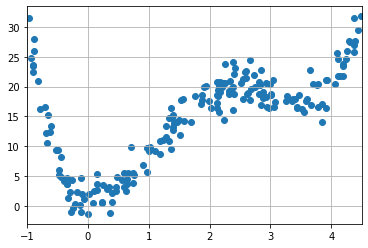

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 真のモデル
def mathfunc(x):
    y = x**4 - 8*x**3 + 18*x**2 - 3*x + 1
    return y

# 定義域（xの範囲: -1.0から4.5）
# 生成するデータの個数は100個
xmin = -1.0
xmax = 4.5
num = 100

# 乱数の種を設定
np.random.seed(0)

# ランダムにxを生成して，昇順にソート
dataX = (xmax - xmin) * np.random.rand(num) + xmin
dataX = np.sort(dataX)

# xからｙを生成する
dataY = mathfunc(dataX)

# yにノイズ（正規乱数（平均0．0， 標準偏差2.0））を加える
dataY += np.random.normal(loc=0.0, scale=2.0, size=num)

# グラフ表示
plt.scatter(dataX, dataY) # 散布図
plt.xlim(xmin, xmax)
plt.grid(True)
plt.show()

### 最小二乗法
次数を変更して実行できる．

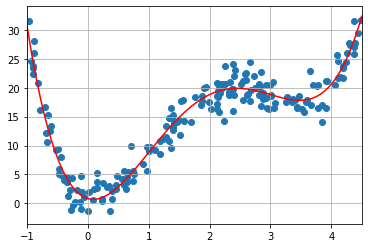

In [16]:
# 次数
dim = 4

# 最小二乗法でパラメータを求める．
ans = np.polyfit(dataX, dataY, dim)


# 求めたパラメータをグラフに表示する

# 定義域（xの範囲: -1.0から4.5）
# 生成するデータの個数は100個
xmin = -1.0
xmax = 4.5
num = 100 

# xを生成
# xminからxmaxまでをnum個で区切る
x = np.linspace(xmin, xmax, num)

# ｘからｙを生成する．
y = np.poly1d(ans)(x)

# グラフ表示
# 求めたパラメータから，それを係数とする多項式を作る．
plt.plot(x, y, color='red')

plt.scatter(dataX, dataY)
plt.xlim(xmin, xmax)
plt.grid(True)
plt.show()

### 演習
生成するデータを100個から20個に変更してみよう．  

最小二乗法で次数3の関数を求めてみよう．  
最小二乗法で次数10の関数を求めてみよう．  
次数を増やすと，ノイズまで学習し，過学習していることがわかる．  

次に，最小二乗法で次数10のままで，生成するデータを200個にしてみよう．   
今度は，過学習をしていないことがわかる．  
データ数が多くなれば，パラメータが多くても過学習を抑えることができる．  